In [3]:
# Partially inspired by Josh Myer
# https://joshisanerd.com/projects/sdr_snippets/gnuradio_and_ipython//0%20First%20Attempt.html

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline  

from gnuradio import blocks, gr, uhd

In [4]:
Fc = int(100.3e6) # MHz
Fs = int(500e3)   # Samples per Second
gain = 50         # dB
N = int(2e6)      # Samples to receive

In [5]:
tb = gr.top_block()

# Set up the USRP for input     
usrp_source = uhd.usrp_source(",", uhd.stream_args(cpu_format="fc32", channels=[0]))
usrp_source.set_samp_rate(Fs)
usrp_source.set_center_freq(Fc, 0)
usrp_source.set_gain(gain, 0)
usrp_source.set_antenna("TX/RX", 0)

# Skip the first samples
skip_head = blocks.skiphead(gr.sizeof_gr_complex, 1)

# Stop after N samples
head = blocks.head(gr.sizeof_gr_complex, N)

# And a sink to dump them into
sink = blocks.vector_sink_c()

tb.connect(usrp_source, skip_head, head, sink)

[INFO] [UHD] linux; GNU C++ version 11.4.0; Boost_107400; UHD_4.8.0.HEAD-0-g308126a4
[INFO] [B200] Detected Device: B200mini
[INFO] [B200] Operating over USB 3.
[INFO] [B200] Initialize CODEC control...
[INFO] [B200] Initialize Radio control...
[INFO] [B200] Performing register loopback test... 
[INFO] [B200] Register loopback test passed
[INFO] [B200] Setting master clock rate selection to 'automatic'.
[INFO] [B200] Asking for clock rate 16.000000 MHz... 
[INFO] [B200] Actually got clock rate 16.000000 MHz.
[INFO] [B200] Asking for clock rate 32.000000 MHz... 
[INFO] [B200] Actually got clock rate 32.000000 MHz.


In [6]:
tb.run()
tb.stop()

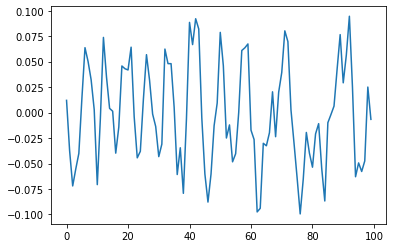

In [7]:
x = np.array(sink.data())
plt.plot(x[0:100].real);

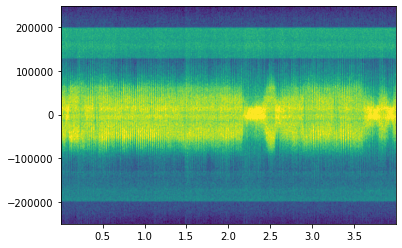

In [8]:
plt.specgram(x, Fs=Fs, vmin=-100, vmax=-75); None

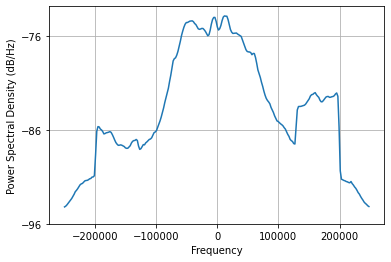

In [9]:
plt.psd(x, Fs=Fs); None